In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from ccsblib import ccsbplotlib as cplt

from data_loading import (load_m1h_activation_data,
                          load_y2h_isoform_data,
                          load_y1h_pdi_data,
                          load_annotated_gencode_tfs,
                          load_DNA_binding_domains)

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel('../data/processed/Nathans_analysis/Breast_cancer/All-BRCA-comparisons3.xlsx',
                   skiprows=1)

# split by increased / decreased fraction
# note that log fold is missnamed and is actually the absolute change in fraction
brca_isos_down = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] <= -0.03) &
                            df['UID'].str.contains('/'), 'UID'].values)
brca_isos_up = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] >= 0.03) &
                            df['UID'].str.contains('/'), 'UID'].values)
brca_isos_down = {x.split('_')[0] for x in brca_isos_down} 
brca_isos_up = {x.split('_')[0] for x in brca_isos_up} 
(len(brca_isos_down), len(brca_isos_up))
brca_isos = set(df.loc[(df['Significant in Any Supervised Comparison'] >= 1)
                    & df['UID'].str.contains('/'), 'UID'].values)
brca_isos = {x.split('_')[0] for x in brca_isos} 

m1h = load_m1h_activation_data()
m1h['mean'] = m1h[['M1H_rep1', 'M1H_rep2', 'M1H_rep3']].mean(axis=1)
m1h['is_brca_iso'] = m1h['clone_acc'].isin(brca_isos)
m1h['tgca_brca_iso'] = 'no'
m1h.loc[m1h['clone_acc'].isin(brca_isos_down), 'tgca_brca_iso'] = 'down'
m1h.loc[m1h['clone_acc'].isin(brca_isos_up), 'tgca_brca_iso'] = 'up'

y1h = load_y1h_pdi_data()
y1h['n_pdi'] = y1h[y1h.columns[2:]].sum(axis=1)
y1h['tgca_brca_iso'] = 'no'
y1h.loc[y1h['clone_acc'].isin(brca_isos_down), 'tgca_brca_iso'] = 'down'
y1h.loc[y1h['clone_acc'].isin(brca_isos_up), 'tgca_brca_iso'] = 'up'

tfs = load_annotated_gencode_tfs()

brca_isos_down = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] <= -0.03) &
                            ~df['UID'].str.contains('/'), 'UID'].values)
brca_isos_up = set(df.loc[(df['adjp-BC_vs_controls'] < 0.05) &
                            (df['log_fold-BC_vs_controls'] >= 0.03) &
                            ~df['UID'].str.contains('/'), 'UID'].values)
brca_isos_down = {y for x in brca_isos_down for y in x.split('|')} 
brca_isos_up = {y for x in brca_isos_up for y in x.split('|')}  
print(len(brca_isos_down), len(brca_isos_up))

reading from cache
494 538


In [3]:
df.loc[df['UID'].str.contains('ATF2'), :].sort_values('UID')

,UID,Lowest Rank,Lowest Aggregate Rank,Significant in Any Comparison,Significant in Any Supervised Comparison,Supervised Aggregate Rank,Supervised Aggregate Score,De Novo Aggregate Rank,De Novo Aggregate Score,Survival Aggregate Rank,Survival Aggregate Score,BC-Illumina Max Ratio,BC-Illumina Aggregate Score,Unsupervised-ICGS2-TPM-rho-0.2 Rank,Unsupervised-ICGS2-TPM-broad Rank,Unsupervised-ICGS2-ratio-based Rank,PAM50 vs. Controls Rank,TCGA BC vs. Controls Rank,Survival Ratio-rank,Survival Ratio(sex corrected)-rank,Survival TPM-rank,ANOVA-rawp,ANOVA-adjp,largest fold,ANOVA-rawp.1,ANOVA-adjp.1,largest fold.1,ANOVA-adjp.2,largest fold.2,avg-controls,avg-Basal-like,avg-HER2-enriched,avg-Luminal A,avg-Luminal B,avg-Normal-like,log_fold-Basal-like_vs_controls,log_fold-HER2-enriched_vs_controls,log_fold-Luminal A_vs_controls,log_fold-Luminal B_vs_controls,log_fold-Normal-like_vs_controls,adjp-Basal-like_vs_controls,adjp-HER2-enriched_vs_controls,adjp-Luminal A_vs_controls,adjp-Luminal B_vs_controls,adjp-Normal-like_vs_controls,lowest-adjp vs. Control,largest fold.3,ANOVA-adjp.3,largest fold.4,ANOVA-rawp.2,ANOVA-adjp.4,largest fold.5,HME,HCC,MCF7,ZC,MDA,avg-BC,log_fold-BC_vs_controls,fold-BC_vs_controls,rawp-BC_vs_controls,adjp-BC_vs_controls,avg-controls.1,LRT,Wald,SlrT,Zscore,LRT -log 10 p,LRT.1,Wald.1,SlrT.1,Zscore.1,BH_LRT,FDR_LRT,-log10 FDR_LRT,LRT.2,Wald.2,SlrT.2,Zscore.2,BH_LRT.1,Survival Ratio significant,Survival Ratio(sex corrected)-significant,Survival TPM-significant,HCC.1,MCF7.1,ZC.1,MDA.1
719,ATF2-202|ATF2-206,197,410.500000,0,0,1917.5,0.0,410.5,0.0,2973.333333,0,0.06,0,384,439,197,2590,1245,2744,2030,4146,8.370000e-131,9.090000e-130,0.078701,1.540000e-127,1.460000e-126,0.073905,0.345576,0.011108,0.081681,0.083608,0.081034,0.075435,0.081120,0.072500,0.001928,-0.000646,-0.006246,-0.000561,-0.009181,0.856716,1.000000,1.165900e-01,1.000000,0.792870,1.165900e-01,0.009181,0.395955,0.011108,1.700000e-174,3.430000e-173,0.065029,0.11,0.13,0.15,0.12,0.17,0.072292,-0.009389,-1.006529,3.248130e-03,9.600898e-03,0.081681,0.721740,0.727607,0.727448,0.348311,0.141619,0.232215,0.232922,0.232929,-1.192866,0.546652,0.546652,0.262289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.04,0.01,0.06
578,ATF2-203|ATF2-201,203,331.500000,3,0,2127.0,0.0,331.5,2.0,2847.333333,0,0.08,0,330,335,203,1150,3104,3640,999,3903,1.620000e-140,2.050000e-139,0.150644,1.630000e-144,2.030000e-143,0.147286,0.000007,0.085700,0.135126,0.131031,0.139828,0.150000,0.163200,0.077500,-0.004095,0.004702,0.014874,0.028074,-0.057626,0.778742,0.814735,5.204778e-02,0.000358,0.020496,3.581360e-04,0.057626,0.000081,0.085700,8.410000e-173,1.650000e-171,0.125426,0.16,0.09,0.22,0.17,0.08,0.132020,-0.003106,-1.002155,5.985328e-01,7.096007e-01,0.135126,0.999717,0.999717,0.999717,-0.000355,0.000123,0.051942,0.044815,0.044856,2.006385,0.248470,0.248470,0.604726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,0.06,0.01,0.08
35,ATF2-204,9,21.500000,5,2,1111.5,2.0,21.5,2.0,2619.333333,0,0.10,0,30,15,9,1587,636,1410,3249,3199,2.690000e-256,3.740000e-254,0.574167,8.980000e-281,2.340000e-278,0.581363,0.002982,0.143214,0.434286,0.492474,0.474655,0.477913,0.450400,0.577500,0.058189,0.040369,0.043627,0.016114,0.143214,0.005066,0.135183,8.029405e-03,0.528305,0.020165,5.066254e-03,0.143214,0.088772,0.127100,0.000000e+00,0.000000e+00,0.386143,0.21,0.26,0.27,0.31,0.31,0.500806,0.066520,1.047188,1.180000e-05,6.850000e-05,0.434286,0.352532,0.346329,0.346167,0.941734,0.452802,0.557049,0.557049,0.557044,0.587230,0.819715,0.819715,0.086337,0.854622,0.854415,0.854414,-0.183489,0.980680,NaN,NaN,NaN,0.05,0.06,0.10,0.10
1449,ATF2-205,581,871.000000,0,0,871.0,0.0,1105.0,0.0,1111.000000,0,0.06,0,1258,954,635,1161,581,1022,1612,699,1.470000e-57,4.880000e-57,0.080417,5.070000e-76,2.210000e-75,0.083358,0.001243,0.021258,0.094706,0.080000,0.073448,0.078609,0.080960,0.080000,-0.014706,-0.021258,-0.016097,-0.013746,-0.014706,0.006011,0.001345,3.721511e-04,0.007064,0.646684,3.721511e-04,0.021258,0.878573,0.007512,6.430000e-82,4.16000

In [4]:
len(brca_isos)

318

In [5]:
m1h['tgca_brca_iso'].value_counts()

no      548
down     49
up       25
Name: tgca_brca_iso, dtype: int64

In [6]:
m1h['is_brca_iso'].sum()

173

MannwhitneyuResult(statistic=42523.0, pvalue=0.0665783775749179)


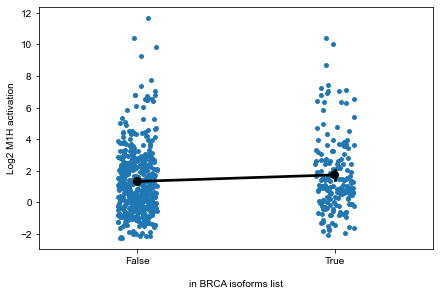

In [7]:
ax = sns.pointplot(data=m1h, x='is_brca_iso', y='mean',
                   color='black')
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100)
print(stats.mannwhitneyu(m1h.loc[m1h['is_brca_iso'], 'mean'].values,
                         m1h.loc[~m1h['is_brca_iso'], 'mean'].values))
sns.stripplot(data=m1h, x='is_brca_iso', y='mean', ax=ax)
ax.set_xlabel('\nin BRCA isoforms list')
ax.set_ylabel('Log2 M1H activation')
plt.savefig('../figures/M1H-by-BRCA-combined-isoform-list_dotplot.pdf',
            bbox_inches='tight')

MannwhitneyuResult(statistic=10083.0, pvalue=0.0038585150490779044)
MannwhitneyuResult(statistic=8221.0, pvalue=0.0904580828325958)


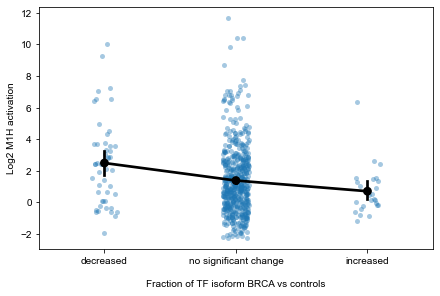

In [8]:
ax = sns.pointplot(data=m1h, x='tgca_brca_iso', y='mean', order=['down', 'no', 'up'],
                   color='black')
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100)
print(stats.mannwhitneyu(m1h.loc[m1h['tgca_brca_iso'] == 'no', 'mean'].values,
                         m1h.loc[m1h['tgca_brca_iso'] == 'down', 'mean'].values))
print(stats.mannwhitneyu(m1h.loc[m1h['tgca_brca_iso'] == 'no', 'mean'].values,
                         m1h.loc[m1h['tgca_brca_iso'] == 'up', 'mean'].values))
sns.stripplot(data=m1h, x='tgca_brca_iso', y='mean', order=['down', 'no', 'up'],
              alpha=0.4, ax=ax)
ax.set_xlabel('\nFraction of TF isoform BRCA vs controls')
ax.set_xticklabels(['decreased', 'no significant change', 'increased'])
ax.set_ylabel('Log2 M1H activation')
plt.savefig('../figures/M1H-by-TGCA-BRCA-up-and-down_dotplot.pdf',
            bbox_inches='tight')

In [9]:
y1h['tgca_brca_iso'].value_counts()

no      182
down     12
up        6
Name: tgca_brca_iso, dtype: int64

In [10]:
print(stats.mannwhitneyu(y1h.loc[y1h['tgca_brca_iso'] == 'no', 'n_pdi'].values,
                         y1h.loc[y1h['tgca_brca_iso'] == 'down', 'n_pdi'].values))
print(stats.mannwhitneyu(y1h.loc[y1h['tgca_brca_iso'] == 'no', 'n_pdi'].values,
                         y1h.loc[y1h['tgca_brca_iso'] == 'up', 'n_pdi'].values))

MannwhitneyuResult(statistic=1102.0, pvalue=0.9592576332397892)
MannwhitneyuResult(statistic=623.0, pvalue=0.5540663788163507)


In [11]:
# TODO: don't overwrite df variable and move to top

def get_longest_isoform(gene):
    return list(sorted(gene.isoforms, key=lambda x: len(x.aa_seq), reverse=True))[0].name

df = pd.concat([g.aa_feature_disruption(get_longest_isoform(g)) for g in tfs.values()])
dbd = load_DNA_binding_domains()
dbd['num_genes'] = dbd['pfam'].map(df.groupby('accession')['gene_symbol'].size())
df['is_DBD'] = df['accession'].isin(dbd['pfam'].values) | df['accession'].str.startswith('C2H2_ZF_array')
df['is_affected'] = (df['deletion'] + df['insertion'] + df['frameshift']) > 0
df = pd.concat([df.loc[df['is_DBD'], :].groupby('alt_iso')['is_affected'].any(),
           pd.Series(index=df['ref_iso'].unique(), data=False)]).to_frame(name='DBD_affected')
df['tgca_brca_iso'] = 'no'
df.loc[df.index.isin(brca_isos_down), 'tgca_brca_iso'] = 'down'
df.loc[df.index.isin(brca_isos_up), 'tgca_brca_iso'] = 'up'

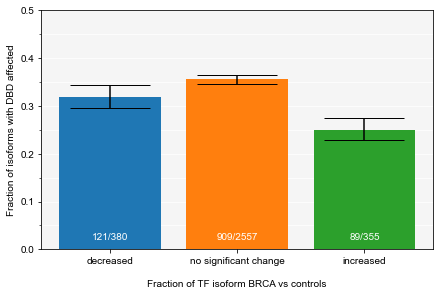

In [12]:
fig, ax = plt.subplots(1, 1)
cplt.validation_plot(data=df, 
                     selections=[df['tgca_brca_iso'] == x for x in ['up', 'no', 'down']],
                     result_column='DBD_affected',
                     errorbar_capsize=0.3,
                     y_max=0.5,
                     ax=ax)
ax.set_xlabel('\nFraction of TF isoform BRCA vs controls')
ax.set_xticklabels(['decreased', 'no significant change', 'increased'])
ax.set_ylabel('Fraction of isoforms with DBD affected')
plt.savefig('../figures/DBD-affected-fraction-by-TGCA-BRCA-up-and-down_bar-chart.pdf',
            bbox_inches='tight')